2026-01-11 19:29:06.594 | INFO     | src.data.loader:load_all_sources:40 - 📦 Loading data from all sources...
2026-01-11 19:29:06.613 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 96 items from tunisianet_latest.json
2026-01-11 19:29:06.638 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 92 items from mytek_latest.json
2026-01-11 19:29:06.674 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 96 items from ldlc_latest.json
2026-01-11 19:29:06.684 | SUCCESS  | src.data.loader:load_all_sources:59 - ✅ Loaded 284 total products from 284 sources
2026-01-11 19:29:06.697 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 96 items from tunisianet_latest.json
2026-01-11 19:29:06.701 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 92 items from mytek_latest.json
2026-01-11 19:29:06.706 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 96 items from ldlc_latest.json


 Total products: 284
 Columns: ['id', 'title', 'price', 'currency', 'regular_price', 'discount_percent', 'brand', 'url', 'image', 'in_stock', 'source', 'country', 'scraped_at', 'processor', 'gpu', 'ram_gb', 'storage', 'screen_size', 'sku', 'description']

 DATA SUMMARY
total_products: 284
sources: {'tunisianet': 96, 'ldlc': 96, 'mytek': 92}
countries: {'Tunisia': 188, 'France': 96}
currencies: {'TND': 188, 'EUR': 96}
missing_prices: 14
missing_titles: 0
date_range: {'min': '2026-01-11T15:59:29.554147', 'max': '2026-01-11T16:01:54.358619'}

 DATA BY SOURCE
tunisianet: 96 products
mytek: 92 products
ldlc: 96 products

 PRICE STATISTICS

TUNISIANET:
count      96.000000
mean      650.989583
std       365.250901
min       179.000000
25%       319.000000
50%       594.000000
75%       919.000000
max      1259.000000
Name: price, dtype: float64

MYTEK:
count     78.000000
mean     432.692308
std      143.853489
min      209.000000
25%      329.000000
50%      404.000000
75%      496.500000
m

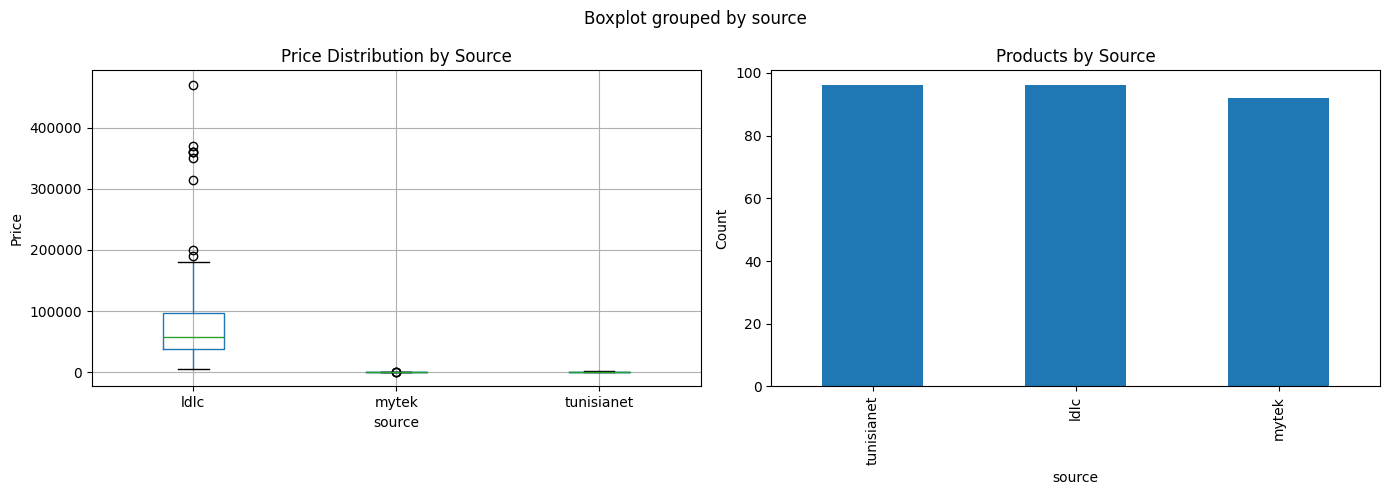


🔍 MISSING DATA
                  Missing Count  Missing %
processor                   276  97.183099
regular_price               260  91.549296
gpu                         211  74.295775
sku                         192  67.605634
description                 192  67.605634
ram_gb                      174  61.267606
storage                     174  61.267606
brand                       146  51.408451
screen_size                 142  50.000000
discount_percent             96  33.802817
image                        96  33.802817
price                        14   4.929577

💱 CURRENCY DISTRIBUTION
country  currency
France   EUR          96
Tunisia  TND         188
dtype: int64

✅ Saved initial data to data/processed/00_initial_data.csv


In [ ]:
"""
01 - Data Loading and Initial Exploration
"""

# %%
# Imports
import sys
sys.path.append('..')

from src.data.loader import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

# Configure pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

# %%
# Load data
loader = DataLoader(data_dir='../data/raw')

# Load all data combined
df_all = loader.load_all_sources()

print(f" Total products: {len(df_all)}")
print(f" Columns: {list(df_all.columns)}")

# %%
# Display first rows
df_all.head(10)

# %%
# Get summary
summary = loader.get_summary(df_all)

print("\n DATA SUMMARY")
print("="*50)
for key, value in summary.items():
    print(f"{key}: {value}")

# %%
# Load by source
sources = loader.load_by_source()

print("\n DATA BY SOURCE")
print("="*50)
for source_name, df_source in sources.items():
    print(f"{source_name}: {len(df_source)} products")

# %%
# Basic statistics
print("\n PRICE STATISTICS")
print("="*50)

for source_name, df_source in sources.items():
    print(f"\n{source_name.upper()}:")
    print(df_source['price'].describe())

# %%
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price distribution by source
df_all.boxplot(column='price', by='source', ax=axes[0])
axes[0].set_title('Price Distribution by Source')
axes[0].set_ylabel('Price')

# Product count by source
df_all['source'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Products by Source')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# %%
# Missing data analysis
print("\n MISSING DATA")
print("="*50)
missing = df_all.isnull().sum()
missing_pct = (missing / len(df_all)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# %%
# Currency distribution
print("\n CURRENCY DISTRIBUTION")
print("="*50)
print(df_all.groupby(['country', 'currency']).size())

# %%
# Save initial stats for later
df_all.to_csv('../data/processed/00_initial_data.csv', index=False)
print("\n Saved initial data to data/processed/00_initial_data.csv")